In [2]:
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.7 MB/s eta 0:00:00


In [3]:
!pip install wordcloud
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 21.1 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=6278b3571222f94ea0b1675e201309730351497da7810d824baa5fe9f6fa4731
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji


In [4]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import cv2
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import joblib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
import joblib
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
# from keras.utils.np_utils import to_categorical
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import cufflinks as cf
import tensorflow
from tensorflow.keras import Sequential
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import keras
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences as pad
from sklearn.preprocessing import LabelEncoder
import re
import pickle
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras_preprocessing.sequence import pad_sequences as pad
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
!pip install git+https://github.com/paulgavrikov/visualkeras
import visualkeras
from sklearn.metrics import  confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-edkuiula
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-edkuiula
  Resolved https://github.com/paulgavrikov/visualkeras to commit cd169b81be347e2090353ad6fe2bd2e1f4020cf4
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 6.5 MB/s eta 0:00:00
  Created wheel for visualkeras: filename=visualkeras-0.0.2-py3-none-any.whl size=13714 sha256=f9dbf92c3f252eed1f74d6370a9fed98cea9aa0506469d8ea5d52e3685393c63
  Stored in directory: /tmp/pip-ephem-wheel-cache-wb8w17qz/wheels/89/d3/c2/937382b33c09192fc84331bbc02c4565d62aeae67e9684c37e
Successfully built visualkeras


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Directory for Rajesh**

In [6]:
file_path="/content/drive/MyDrive/Research Work/Violence Project/Dataset/train.csv"

In [7]:
df=pd.read_csv("/content/drive/MyDrive/Research Work/Violence Project/Dataset/train.csv")

In [8]:
df.head()

,text,label
0,যে দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভ...,1
1,এই বিচার শেষ বিচার নয়।আসল বিচার হবে আল্লাহর আদ...,0
2,আরব দেশগুলোকে বলব ভারতের সাথে সব ব্যবসা বাণিজ্...,2
3,দেশটা সুস্থ নাই,0
4,আপনার কথা দুঃখ জনক আগে বিডিও থাকলে কেন ধরা হলন...,0


In [9]:
df.dtypes

text     object
label     int64
dtype: object

In [10]:
# Define label mapping
label_mapping = {
    0: 'Non-Violence',
    1: 'Passive Violence',
    2: 'Direct Violence'
}

In [11]:
# Rename the label column using the mapping
df['label'] = df['label'].replace(label_mapping)

In [12]:
# Print the counts of each category
print("Total Comment:", len(df))
print("Total Non-Violence:", len(df[df['label'] == 'Non-Violence']))
print("Total Passive Violence:", len(df[df['label'] == 'Passive Violence']))
print("Total Direct Violence:", len(df[df['label'] == 'Direct Violence']))

Total Comment: 2700
Total Non-Violence: 1389
Total Passive Violence: 922
Total Direct Violence: 389


In [13]:
df.shape

(2700, 2)

My Data is not Label, Now I want to Label My Data using sampling

# **Remove Duplicates**

In [14]:
df.shape

(2700, 2)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.shape

(2700, 2)

Here Are no duplicate values

# **In this section I want to check null value**

In [17]:
df.isnull().sum()

text     0
label    0
dtype: int64

# **Remove Small Text and Long Text**

In [18]:
df['no_char'] = df['text'].apply(lambda Sentence: len(Sentence))

In [19]:
df['length'] = df['text'].apply(lambda x:len(x.split()))

In [20]:
dataset = df.loc[df.length>2]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small conversations".format(len(df)-len(dataset)),
      "\nTotal conversations:",len(dataset))

After Cleaning: 
Removed 47 Small conversations 
Total conversations: 2653


In [21]:
dataset.shape

(2653, 4)

In [22]:
newdf = dataset.loc[dataset['length'] <= 60]
newdf = newdf.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Big conversations".format(len(dataset)-len(newdf)),
      "\nTotal conversations:",len(newdf))

After Cleaning: 
Removed 61 Big conversations 
Total conversations: 2592


In [23]:
newdf.shape

(2592, 4)

In [24]:
df=newdf.copy()

In [25]:
df.shape

(2592, 4)

In [26]:
df.head()

,text,label,no_char,length
0,যে দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভ...,Passive Violence,60,10
1,এই বিচার শেষ বিচার নয়।আসল বিচার হবে আল্লাহর আদ...,Non-Violence,88,15
2,আরব দেশগুলোকে বলব ভারতের সাথে সব ব্যবসা বাণিজ্...,Direct Violence,120,22
3,দেশটা সুস্থ নাই,Non-Violence,15,3
4,আপনার কথা দুঃখ জনক আগে বিডিও থাকলে কেন ধরা হলন...,Non-Violence,83,16


# **Below I have cleaned my dataset (Puncuation,links, emoji, non-character)**

In [27]:
import pandas as pd
import regex as re

def remove_non_bengali_characters(sentence):
    cleaned_sentence = re.sub(r'\P{Bengali}+', ' ', sentence)
    return cleaned_sentence.strip()

In [28]:
df['Sentences'] = df['text'].apply(remove_non_bengali_characters)

In [29]:
df.drop(["no_char","text"],axis=1,inplace=True)

In [30]:
df.head()

,label,length,Sentences
0,Passive Violence,10,যে দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভ...
1,Non-Violence,15,এই বিচার শেষ বিচার নয় আসল বিচার হবে আল্লাহর আদ...
2,Direct Violence,22,আরব দেশগুলোকে বলব ভারতের সাথে সব ব্যবসা বাণিজ্...
3,Non-Violence,3,দেশটা সুস্থ নাই
4,Non-Violence,16,আপনার কথা দুঃখ জনক আগে বিডিও থাকলে কেন ধরা হলন...


In [31]:
import re

# Define a regular expression pattern to match Bengali characters and spaces
bengali_pattern = re.compile("[\u0980-\u09FF ]+")

# Function to remove non-Bengali characters from a string
def remove_non_bengali_chars(text):
    return "".join(filter(bengali_pattern.match, text))

# Apply the function to each element in your dataset
df['Bengali_Text'] = df['Sentences'].apply(remove_non_bengali_chars)


In [32]:
df.drop(["Sentences","length"],axis=1,inplace=True)

In [33]:
df.head()

,label,Bengali_Text
0,Passive Violence,যে দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভ...
1,Non-Violence,এই বিচার শেষ বিচার নয় আসল বিচার হবে আল্লাহর আদ...
2,Direct Violence,আরব দেশগুলোকে বলব ভারতের সাথে সব ব্যবসা বাণিজ্...
3,Non-Violence,দেশটা সুস্থ নাই
4,Non-Violence,আপনার কথা দুঃখ জনক আগে বিডিও থাকলে কেন ধরা হলন...


# **Remove Stopwords**

# **This Directory for mam**

In [34]:
# def process_conversations(Conversation):
#     stp = open('/content/drive/MyDrive/MY RESEARCH/EMNLP/Dataset/Stopwords.txt','r',encoding="utf8").read().split()
#     result = Conversation.split()
#     Conversation = [word.strip() for word in result if word not in stp ]
#     Conversation =" ".join(Conversation)
#     Conversation = re.sub('[^\u0980-\u09FF]',' ',str(Conversation))
#     return Conversation

In [35]:
# df['cleaned'] = df['Bengali_Text'].apply(process_conversations)
# sample_data = [10,400]
# for i in sample_data:
#      print('Original:\n',df.Bengali_Text[i],'\nCleaned:\n',
#            df.cleaned[i],'\n','Detected as:-- ',df.label[i],'\n')

In [36]:
def process_conversations(Conversation):
    stp = open('/content/drive/MyDrive/Research Work/EMNLP/Dataset2/Stopwords.txt','r',encoding="utf8").read().split()
    result = Conversation.split()
    Conversation = [word.strip() for word in result if word not in stp ]
    Conversation =" ".join(Conversation)
    Conversation = re.sub('[^\u0980-\u09FF]',' ',str(Conversation))
    return Conversation

In [37]:
  df['cleaned'] = df['Bengali_Text'].apply(process_conversations)
  sample_data = [10,400]
  for i in sample_data:
      print('Original:\n',df.Bengali_Text[i],'\nCleaned:\n',
            df.cleaned[i],'\n','Detected as:-- ',df.label[i],'\n')

Original:
 ক্ষুব্ধ শিক্ষার্থীদের হল বন্ধ করার দিদ্ধান্তটি আরোবেশি খারাপ করবে 
Cleaned:
 ক্ষুব্ধ শিক্ষার্থীদের বন্ধ দিদ্ধান্তটি আরোবেশি খারাপ 
 Detected as:--  Non-Violence 

Original:
 আকাশ ভরা তারা ব্যবসায়ের গোয়া মারা সারা 
Cleaned:
 আকাশ ভরা ব্যবসায়ের গোয়া মারা সারা 
 Detected as:--  Non-Violence 



In [38]:
df.head()

,label,Bengali_Text,cleaned
0,Passive Violence,যে দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভ...,দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভাবে...
1,Non-Violence,এই বিচার শেষ বিচার নয় আসল বিচার হবে আল্লাহর আদ...,বিচার শেষ বিচার আসল বিচার আল্লাহর আদালতে সেইদি...
2,Direct Violence,আরব দেশগুলোকে বলব ভারতের সাথে সব ব্যবসা বাণিজ্...,আরব দেশগুলোকে বলব ভারতের সাথে ব্যবসা বাণিজ্য ব...
3,Non-Violence,দেশটা সুস্থ নাই,দেশটা সুস্থ
4,Non-Violence,আপনার কথা দুঃখ জনক আগে বিডিও থাকলে কেন ধরা হলন...,কথা দুঃখ জনক বিডিও থাকলে হলনা হিন্দু দের খতি হ...


# **Stemming**

In [39]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

df['cleaned']=df['cleaned'].apply(stemming)
df.head()

,label,Bengali_Text,cleaned
0,Passive Violence,যে দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভ...,দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভাবে...
1,Non-Violence,এই বিচার শেষ বিচার নয় আসল বিচার হবে আল্লাহর আদ...,বিচার শেষ বিচার আসল বিচার আল্লাহর আদালতে সেইদি...
2,Direct Violence,আরব দেশগুলোকে বলব ভারতের সাথে সব ব্যবসা বাণিজ্...,আরব দেশগুলোকে বলব ভারতের সাথে ব্যবসা বাণিজ্য ব...
3,Non-Violence,দেশটা সুস্থ নাই,দেশটা সুস্থ
4,Non-Violence,আপনার কথা দুঃখ জনক আগে বিডিও থাকলে কেন ধরা হলন...,কথা দুঃখ জনক বিডিও থাকলে হলনা হিন্দু দের খতি হ...


In [40]:
df.drop("Bengali_Text",axis=1,inplace=True)

In [41]:
print("Total Comment:", len(df))
print("Total Non-Violence:", len(df[df['label'] == 'Non-Violence']))
print("Total Passive Violence:", len(df[df['label'] == 'Passive Violence']))
print("Total Direct Violence:", len(df[df['label'] == 'Direct Violence']))

Total Comment: 2592
Total Non-Violence: 1336
Total Passive Violence: 881
Total Direct Violence: 375


# **WordCloud**

In [42]:
from wordcloud import WordCloud
from textwrap import wrap
from collections import Counter

import matplotlib.pyplot as plt
from matplotlib import font_manager

# Function for generating word clouds
def generate_wordcloud(data,title):
  data = [tuple(x) for x in data.values]
  wc = WordCloud(font_path="/content/drive/MyDrive/Simple Complex Compound/Font/kalpurush-2.ttf",width=1080, height=720, max_words=150,colormap="Dark2").generate_from_frequencies(dict(data))
  plt.figure(figsize=(10,8))
  plt.imshow(wc, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap("Word Cloud of "+title,60)),fontsize=13)
  plt.show()

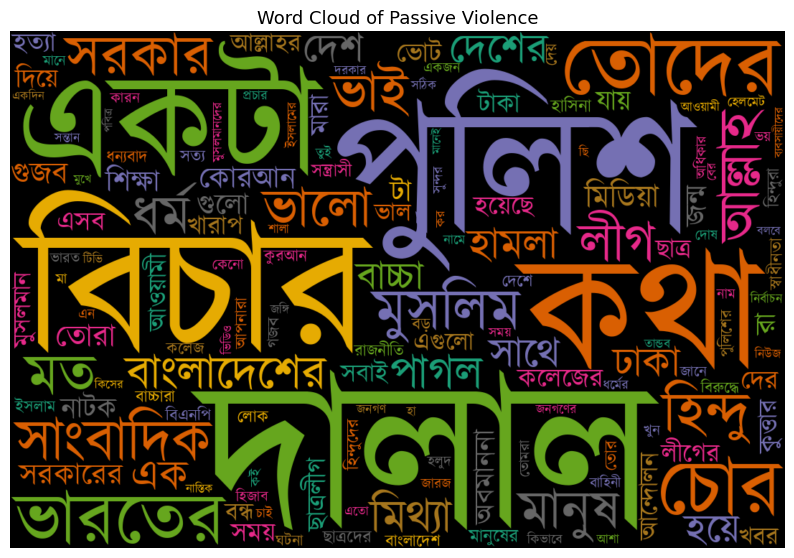

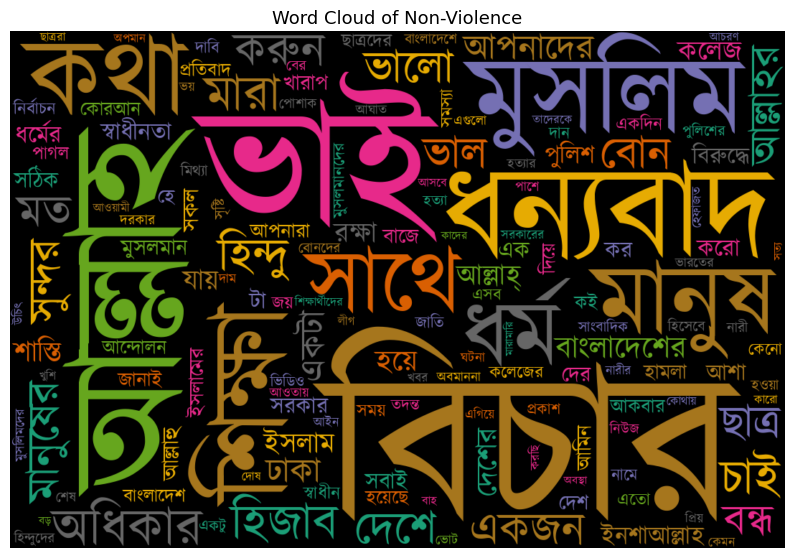

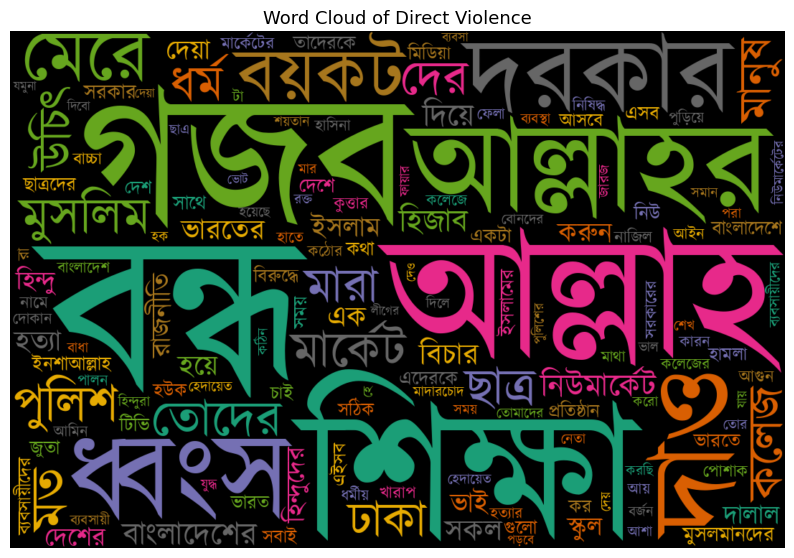

In [43]:
category_list=df.label.unique()
category_list

for i in category_list:
    temp=df.loc[df['label'] == str(i)]
    #display(temp)
    temp['temp_list'] = df['cleaned'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in temp['temp_list'] for item in sublist])
    temp = pd.DataFrame(top.most_common(500000))
    temp.columns = ['Common_words','count']
    generate_wordcloud(temp,str(i))

In [44]:
!pip instal bnlp

ERROR: unknown command "instal" - maybe you meant "install"


In [45]:
# from collections import defaultdict
# from collections import  Counter
# from bnlp.corpus import stopwords
# import matplotlib.font_manager as fm

# def show_stop_words(corpus, length=20):
#   dic = defaultdict(int)

#   for word in corpus:
#       if word in stopwords:
#           dic[word]+=1

#   top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:length]
#   x,y=zip(*top)
#   print(x)
#   print(y)
#   plt.figure(figsize=(10,5))
#   plt.bar(x,y)
#   plt.show()

# **My Data is not Labeled That's why I am going to Augment my Neutral Data**

In [46]:
df.head()

,label,cleaned
0,Passive Violence,দেশে সন্ত্রাসরা দেশ চালায়সে দেশে শান্তি কিভাবে...
1,Non-Violence,বিচার শেষ বিচার আসল বিচার আল্লাহর আদালতে সেইদি...
2,Direct Violence,আরব দেশগুলোকে বলব ভারতের সাথে ব্যবসা বাণিজ্য ব...
3,Non-Violence,দেশটা সুস্থ
4,Non-Violence,কথা দুঃখ জনক বিডিও থাকলে হলনা হিন্দু দের খতি হ...


In [47]:
!pip install bangla-stemmer

In [48]:
from bangla_stemmer.stemmer import stemmer
import pandas as pd
def augment_neutral_data(text):
    stmr = stemmer.BanglaStemmer()
    augmented_text = stmr.stem(text)
    return augmented_text
neutral_data = df[df['label'] == 'Direct Violence']['cleaned']
augmented_neutral_data = neutral_data.apply(augment_neutral_data)
augmented_df = pd.DataFrame({'cleaned': augmented_neutral_data, 'label': 'Direct Violence'})
# Concatenate the augmented data with the original DataFrame
augmented_df = pd.concat([df, augmented_df], ignore_index=True)

print(augmented_df)

applied first rules..
applied third rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied third rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied third rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied

In [49]:
df=augmented_df.copy()

In [50]:
print("Total Comment:", len(df))
print("Total Non-Violence:", len(df[df['label'] == 'Non-Violence']))
print("Total Passive Violence:", len(df[df['label'] == 'Passive Violence']))
print("Total Direct Violence:", len(df[df['label'] == 'Direct Violence']))

Total Comment: 2967
Total Non-Violence: 1336
Total Passive Violence: 881
Total Direct Violence: 750


In [51]:
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [52]:
def label_encoding(sentiment,bool):

    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels)
    class_names =le.classes_
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels
from sklearn.model_selection import train_test_split

def dataset_split(news, Label):
    '''
    This function will split the dataset into Train-Test-Validation set
    '''

    X_train, X_test, y_train, y_test = train_test_split(news, Label, train_size=0.8, test_size=0.2, random_state=0)
    print(color.BOLD + "Feature Size :======>" + color.END, X_train.shape[1])
    print(color.BOLD + "\nDataset Distribution:\n" + color.END)
    print("\tSet Name", "\t\tSize")
    print("\t========\t\t======")

    print("\tFull\t\t\t", news.shape[0],
          "\n\tTraining\t\t", X_train.shape[0],
          "\n\tTest\t\t\t", X_test.shape[0])

    return X_train, X_test, y_train, y_test



In [53]:
# def dataset_split(feature_space,sentiment):

#     X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.8,
#                                                   test_size = 0.2,random_state =0)
#     print("Feature Size :======>",X_train.shape[1])
#     print("\nDataset Distribution:\n")
#     print("\tSet Name","\t\tSize")
#     print("\t========\t\t======")

#     print("\tFull\t\t\t",feature_space.shape[0],
#         "\n\tTraining\t\t",X_train.shape[0],
#         "\n\tTest\t\t\t",X_test.shape[0])

#     return X_train,X_test,y_train,y_test

In [54]:
def calc_gram_tfidf(Conversations):
    tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer=lambda x: x.split())
    X = tfidf.fit_transform(Conversations)

    return tfidf,X

In [55]:
def ml_models_defination():

    lr_model = LogisticRegression()
    dt_model = DecisionTreeClassifier()
    rf_model = RandomForestClassifier()
    mnb_model = MultinomialNB(alpha=0.12)
    knn_model = KNeighborsClassifier(n_neighbors=3)
    svm_model = SVC(kernel = 'linear', C=1.01, degree=1, gamma='auto')
    sgd_model = SGDClassifier(loss = 'log',penalty='l2', max_iter=5)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','SVM','sgd']

    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,svm_model,sgd_model]

    return ml_models,model_names

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def model_performance(model, X_train, X_test, y_train, y_test):
    my_dict = {}
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)

    # Accuracy
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y), 4) * 100

    # Precision, Recall, and F1 Score
    average = 'weighted'  # Choose appropriate average strategy for multi-class
    my_dict['Precision'] = round(precision_score(y_test, pred_y, average=average), 4) * 100
    my_dict['Recall'] = round(recall_score(y_test, pred_y, average=average), 4) * 100
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y, average=average), 4) * 100

    return my_dict


In [57]:
def performance_table(performance_dict):

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []

    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    model_names = ['Logistic Regression','Decision Tree','Random Forest','Multi. Naive Bayes','KNN','SVM','SGD']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,'Model Name':model_names })
    return performance_df

In [58]:
y = ["আমি মনে করি আমি আমার টাকা অপচয়"]
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
get_top_n_words(y,3)


[('আম মন', 1), ('মন কর', 1), ('কর আম', 1)]

In [59]:
z = ["আমি মনে করি আমি আমার টাকা অপচয়"]
def get_top_n_words(x, n):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis = 0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]
get_top_n_words(z,3)

[('আম মন কর', 1), ('মন কর আম', 1), ('কর আম আম', 1)]

In [60]:
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]

for i,gram in enumerate(ngrams):
     tfidf,feature = calc_gram_tfidf(df.cleaned)
     labels = label_encoding(df.label,False)
     X_train,X_test,y_train,y_test = dataset_split(feature,labels)
     ml_models,model_names = ml_models_defination()
     accuracy = {f'{model_names[j]}': model_performance(model, X_train, X_test, y_train, y_test) for j, model in enumerate(ml_models)}

     with open(f'ml_performance_{gram_names[i]}.json', 'w') as f:
           json.dump(accuracy,f)

Feature Size :======> 52873

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2967 
	Training		 2373 
	Test			 594
Feature Size :======> 52873

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2967 
	Training		 2373 
	Test			 594
Feature Size :======> 52873

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 2967 
	Training		 2373 
	Test			 594


In [61]:
table = performance_table(accuracy)
df3 =pd.DataFrame(table)
table

,Accuracy,Precision,Recall,F1 Score,Model Name
0,73.91,75.26,73.91,72.11,Logistic Regression
1,69.02,69.33,69.02,68.72,Decision Tree
2,76.09,77.60,76.09,74.02,Random Forest
3,70.54,71.52,70.54,70.13,Multi. Naive Bayes
4,61.78,62.93,61.78,61.48,KNN
5,76.94,76.50,76.94,76.10,SVM
6,76.94,76.75,76.94,75.64,SGD


In [62]:
# X_train, X_test, y_train, y_test = train_test_split(df['cleaned'], df['label'], test_size=0.2, random_state=42)

# # Convert the text data into numerical vectors using CountVectorizer
# vectorizer = CountVectorizer()
# X_train_vect = vectorizer.fit_transform(X_train)
# X_test_vect = vectorizer.transform(X_test)

In [63]:
# from sklearn.linear_model import SGDClassifier  # Import SGDClassifier

# # Initialize and train the SGDClassifier
# sgd_classifier = SGDClassifier()  # Create an instance of the SGDClassifier
# sgd_classifier.fit(X_train_vect, y_train)  # Train the classifier on the training data

# # Make predictions on the testing data using the SGDClassifier
# y_pred = sgd_classifier.predict(X_test_vect)  # Predict using the trained classifier

# # ..

In [64]:

# # Now you can save the SGDClassifier model if it performs well
# # You can save it using joblib as shown earlier
# model_directory = "/content/drive/MyDrive/Research Work/Violence Project/Model"
# model_filename = f"{model_directory}/sgd_classifier_model.joblib"
# joblib.dump(sgd_classifier, model_filename)
# print(f"SGD Classifier model saved to {model_filename}")

In [65]:
# import joblib
# from sklearn.metrics import f1_score

# # Initialize variables to keep track of the best model, algorithm name, and score
# best_model = None
# best_algorithm_name = None
# best_score = 0.0  # You can use a different metric as needed

# # Dictionary of algorithms and their names
# algorithms = {
#     'MultinomialNB': MultinomialNB(),
#     "Logistice Regression": LogisticRegression(),
#     "Decision Tree":DecisionTreeClassifier(),
#     'RandomForest': RandomForestClassifier(),
#     "KNN":KNeighborsClassifier(n_neighbors=3),
#     "SVM":SVC(kernel = 'linear', C=1.01, degree=1, gamma='auto'),
#     "SGD":SGDClassifier(loss = 'log',penalty='l2', max_iter=5)
#     # Add more algorithms with their names
# }

# for algorithm_name, algorithm in algorithms.items():
#     # Train the current algorithm
#     algorithm.fit(X_train_vect, y_train)

#     # Make predictions on the testing data
#     y_pred = algorithm.predict(X_test_vect)

#     # Calculate the evaluation metric (e.g., F1 score)
#     current_score = f1_score(y_test, y_pred, average='weighted')

#     # Check if the current algorithm has a better score than the previous best
#     if current_score > best_score:
#         best_score = current_score
#         best_algorithm_name = algorithm_name  # Store the best algorithm name
#         best_model = algorithm  # Store the best model

In [66]:
# model_directory = "/content/drive/MyDrive/Research Work/Violence Project/Model"
# model_filename = f"{model_directory}/best_model.joblib"
# joblib.dump(best_model, model_filename)
# print(f"Best model ({best_algorithm_name}) saved to {model_filename}")

In [67]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# # Assuming you have already selected the best model and stored it in 'best_model'
# # Make predictions on the testing data using the best model
# y_pred_best = best_model.predict(X_test_vect)

# # Calculate the accuracy, precision, recall, and F1 score on the testing data
# accuracy = accuracy_score(y_test, y_pred_best) * 100
# precision = precision_score(y_test, y_pred_best, average='weighted') * 100
# recall = recall_score(y_test, y_pred_best, average='weighted') * 100
# f1 = f1_score(y_test, y_pred_best, average='weighted') * 100

# # Print the evaluation metrics of the best model as percentages
# print(f"Best Model ({best_algorithm_name}) Evaluation Metrics (in percentages):")
# print(f"Accuracy: {accuracy:.2f}%")
# print(f"Precision: {precision:.2f}%")
# print(f"Recall: {recall:.2f}%")
# print(f"F1 Score: {f1:.2f}%")
